In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('Pret_depenser_data.csv')


In [75]:
df = df.iloc[0:30000,]
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100002.0,1,0.0,0.5,0.0,1.0,0.000000,0.228941,0.224245,0.180562,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,100003.0,0,0.0,0.0,0.0,0.0,0.000000,0.306047,0.715904,0.465903,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0,1.0,0.5,1.0,1.0,0.000000,0.074729,0.073684,0.055485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0,0.0,0.0,0.0,1.0,0.000000,0.151835,0.172183,0.126589,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0,0.0,0.5,0.0,1.0,0.000000,0.136413,0.283230,0.188635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,134821.0,0,0.0,0.5,1.0,0.0,0.000031,0.228941,0.407959,0.287920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,134822.0,0,0.0,0.0,0.0,1.0,0.000015,0.254643,0.713047,0.460299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,134825.0,0,0.0,0.0,1.0,1.0,0.000015,0.151835,0.148512,0.138051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,134826.0,0,0.0,0.0,0.0,1.0,0.000000,0.110711,0.135924,0.220775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df.iloc[1]

SK_ID_CURR                         100003.0
TARGET                                  0.0
NAME_CONTRACT_TYPE                      0.0
CODE_GENDER                             0.0
FLAG_OWN_CAR                            0.0
                                     ...   
WALLSMATERIAL_MODE_Monolithic           0.0
WALLSMATERIAL_MODE_Others               0.0
WALLSMATERIAL_MODE_Panel                0.0
WALLSMATERIAL_MODE_Stone, brick         0.0
WALLSMATERIAL_MODE_Wooden               0.0
Name: 1, Length: 236, dtype: float64

In [77]:
features = list(df.columns)

In [78]:
data = pd.DataFrame(data=df,columns=features)

## Séparons nos données en un jeu de test et un jeu d'entraînement

In [79]:
x =  data.drop('TARGET', 1)
y = data[["TARGET"]]

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [80]:
x.shape

(30000, 235)

In [81]:
y.shape

(30000, 1)

In [82]:
y.value_counts()*100/len(y.index)

TARGET
0         91.99
1          8.01
dtype: float64

In [83]:
x

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100002.0,0.0,0.5,0.0,1.0,0.000000,0.228941,0.224245,0.180562,0.180562,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,100003.0,0.0,0.0,0.0,0.0,0.000000,0.306047,0.715904,0.465903,0.465903,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,1.0,0.5,1.0,1.0,0.000000,0.074729,0.073684,0.055485,0.055485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,0.0,1.0,0.000000,0.151835,0.172183,0.126589,0.126589,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,0.5,0.0,1.0,0.000000,0.136413,0.283230,0.188635,0.188635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,134821.0,0.0,0.5,1.0,0.0,0.000031,0.228941,0.407959,0.287920,0.287920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,134822.0,0.0,0.0,0.0,1.0,0.000015,0.254643,0.713047,0.460299,0.460299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,134825.0,0.0,0.0,1.0,1.0,0.000015,0.151835,0.148512,0.138051,0.138051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,134826.0,0.0,0.0,0.0,1.0,0.000000,0.110711,0.135924,0.220775,0.220775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
y

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,0
29998,0


## Créer le premier data

In [85]:
# Diviser le DataSet train et test

from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y,  test_size=0.10, random_state=42)


In [86]:
print(f"la taille de X_train est {X_train.shape}")
print(f"la taille de X_test est {X_test.shape}")
print(f"la taille de y_train est {y_train.shape}")
print(f"la taille de y_test est {y_test.shape}")

la taille de X_train est (27000, 235)
la taille de X_test est (3000, 235)
la taille de y_train est (27000, 1)
la taille de y_test est (3000, 1)


In [87]:
y_train.value_counts(),y_test.value_counts()

(TARGET
 0         24846
 1          2154
 dtype: int64,
 TARGET
 0         2751
 1          249
 dtype: int64)

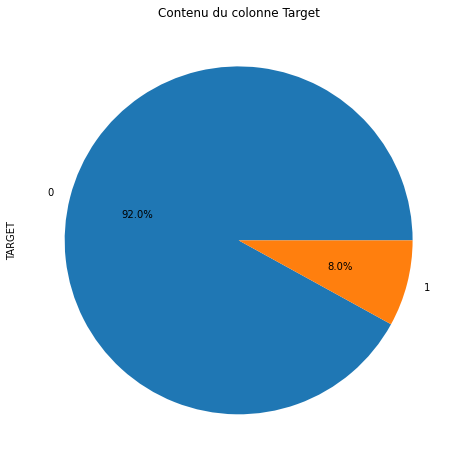

In [88]:
# visualiser la distrubition de contenu du colonne Traget

plt.figure(figsize=(15,8))
data['TARGET'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Contenu du colonne Target")
plt.show()

## Sur-échantillonner la classe minoritaire avec SMOTE

In [89]:

print(X_train.columns.tolist())

['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MOD

In [90]:
#conda install -c glemaitre imbalanced-learn

In [91]:
#!pip install imblearn

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:

sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [94]:
print(f"la taille de X_res est {X_res.shape}")
print(f"la taille de y_res est {y_res.shape}")

la taille de X_res est (49692, 235)
la taille de y_res est (49692, 1)


In [95]:
y_res.value_counts(),y_test.value_counts()

(TARGET
 0         24846
 1         24846
 dtype: int64,
 TARGET
 0         2751
 1          249
 dtype: int64)

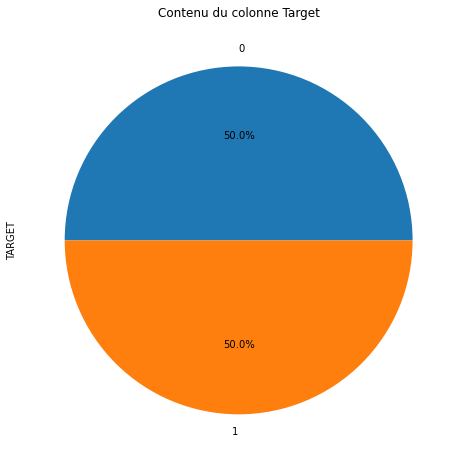

In [96]:
# visualiser la distrubition de contenu du colonne Traget

plt.figure(figsize=(15,8))
y_res['TARGET'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Contenu du colonne Target")
plt.show()

#  DummyClassifier

In [97]:
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score

## DummyClassifier avce le data original

In [26]:
from sklearn.dummy import DummyClassifier

[0 0 0 ... 0 0 0]
[0]
le rapport de classificatiob de l'algorithme EEC est : 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2751
           1       0.00      0.00      0.00       249

    accuracy                           0.92      3000
   macro avg       0.46      0.50      0.48      3000
weighted avg       0.84      0.92      0.88      3000

fbeta_score Train =  0.4914783516900873
fbeta_score Train =  0.4911096829477292


C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


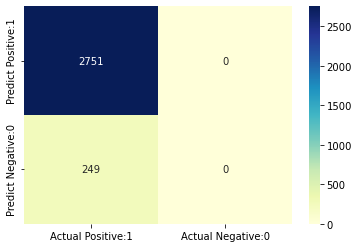

In [27]:

# define model
DMC = DummyClassifier()


DMC1 = DMC.fit(X_train,y_train)
# Faire des nouvelles prediction
y_pred = DMC1.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme EEC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_DMC1_train = fbeta_score(y_train, DMC1.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_DMC1_train}")

f2_DMC1_test = fbeta_score(y_test, DMC1.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_DMC1_test}")

## DummyClassifier avce le data SMOTE

[0 0 0 ... 0 0 0]
[0]
le rapport de classificatiob de l'algorithme EEC est : 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2751
           1       0.00      0.00      0.00       249

    accuracy                           0.92      3000
   macro avg       0.46      0.50      0.48      3000
weighted avg       0.84      0.92      0.88      3000

fbeta_score Train =  0.4166666666666667
fbeta_score Train =  0.4911096829477292


C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


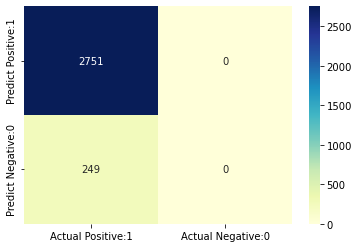

In [28]:

# define model
DMC = DummyClassifier()


DMC2 = DMC.fit(X_res, y_res)
# Faire des nouvelles prediction
y_pred = DMC2.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme EEC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_DMC2_train = fbeta_score(y_res, DMC2.predict(X_res), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_DMC2_train}")

f2_DMC2_test = fbeta_score(y_test, DMC2.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_DMC2_test}")

# Algorithme Logistic regression

## Logistic regression avce le data original

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]
[0]
le rapport de classificatiob de l'algorithme logistic regression  est : 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2751
           1       0.00      0.00      0.00       249

    accuracy                           0.92      3000
   macro avg       0.46      0.50      0.48      3000
weighted avg       0.84      0.92      0.88      3000

fbeta_score Train = 0.4914783516900873
fbeta_score Train = 0.4911096829477292


C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


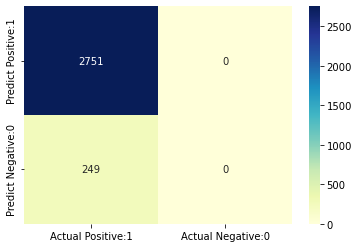

In [29]:
# cross-validation
cv = StratifiedKFold(n_splits=5)
# define model
lr = LogisticRegressionCV(solver='liblinear',cv=cv)


lr1 = lr.fit(X_train,y_train)
# Faire des nouvelles prediction
y_pred = lr1.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme logistic regression  est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_lr1_train = fbeta_score(y_train, lr1.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train = {f2_lr1_train}")

f2_lr1_test = fbeta_score(y_test, lr1.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train = {f2_lr1_test}")

## Logistic regression avce le data SMOTE

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[1 0 0 ... 1 0 0]
[0 1]
le rapport de classificatiob de l'algorithme logistic regression  est : 

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      2751
           1       0.11      0.58      0.18       249

    accuracy                           0.57      3000
   macro avg       0.52      0.58      0.45      3000
weighted avg       0.87      0.57      0.67      3000

fbeta_score Train =  0.4798940435026906
fbeta_score Train =  0.467309876884345


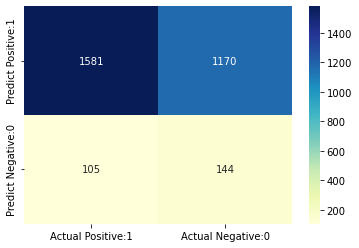

In [30]:
tuned_parameters = {'Cs': [10,30,20],
                   'max_iter' : [100, 50, 75],
                    'n_jobs': [1, 2, 3]
                   }


model = LogisticRegressionCV() 
# define model
lr = GridSearchCV(model,tuned_parameters, cv=3)

lr2 = lr.fit(X_res, y_res)
# Faire des nouvelles prediction
y_pred = lr2.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme logistic regression  est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score


f2_lr2_train = fbeta_score(y_train, lr2.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_lr2_train}")

f2_lr2_test = fbeta_score(y_test, lr2.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_lr2_test}")




## Logistic regression avce le data original en utilisant le Class Weights

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BEN

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinea

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinea

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Us

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinea

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinea

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: L

[1 1 0 ... 1 0 1]
[0 1]
le rapport de classificatiob de l'algorithme logistic regression est : 

              precision    recall  f1-score   support

           0       0.94      0.63      0.75      2751
           1       0.12      0.54      0.19       249

    accuracy                           0.62      3000
   macro avg       0.53      0.58      0.47      3000
weighted avg       0.87      0.62      0.70      3000

fbeta_score Train =  0.5168703865810279
fbeta_score Train =  0.4901782623745241


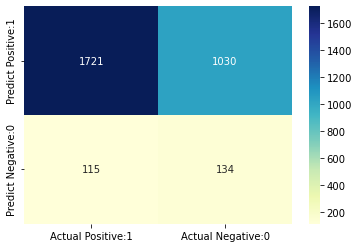

In [31]:


tuned_parameters = {'Cs': [10,30,20],
                   'max_iter' : [100, 50, 75],
                    'n_jobs': [1, 2, 3]
                   }
 

model = LogisticRegressionCV(solver='liblinear',class_weight='balanced') 
# define model
lr = GridSearchCV(model,tuned_parameters, cv=3)



#clf = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, cv=3, scoring="accuracy")


lr3 = lr.fit(X_train,y_train)
# Faire des nouvelles prediction
y_pred = lr3.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme logistic regression est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score

f2_lr3_train = fbeta_score(y_train, lr3.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_lr3_train}")

f2_lr3_test = fbeta_score(y_test, lr3.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_lr3_test}")


## Logistic regression avce le data SMOTE en utilisant le Class Weights

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[1 0 0 ... 1 0 1]
[0 1]
le rapport de classificatiob de l'algorithme logistic regression est : 

              precision    recall  f1-score   support

           0       0.94      0.63      0.75      2751
           1       0.12      0.53      0.19       249

    accuracy                           0.62      3000
   macro avg       0.53      0.58      0.47      3000
weighted avg       0.87      0.62      0.71      3000

fbeta_score Train =  0.5201386070045702
fbeta_score Train =  0.491467349275345
 les meilleures parametres sont: {'Cs': 10, 'max_iter': 100, 'n_jobs': 1}


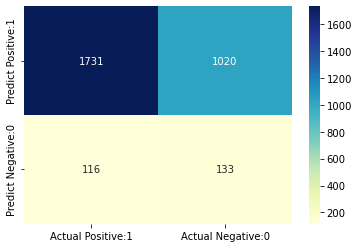

In [32]:


tuned_parameters = {'Cs': [10,30,20],
                   'max_iter' : [100, 50, 75],
                    'n_jobs': [1, 2, 3]
                   }
 

model = LogisticRegressionCV(solver='liblinear',class_weight='balanced') 
# define model
lr = GridSearchCV(model,tuned_parameters, cv=3)


lr4 = lr.fit(X_res, y_res)
# Faire des nouvelles prediction
y_pred = lr4.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme logistic regression est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
f2_lr4_train = fbeta_score(y_train, lr4.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_lr4_train}")

f2_lr4_test = fbeta_score(y_test, lr4.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_lr4_test}")

print(f" les meilleures parametres sont: {lr.best_params_}")


# Algorithme Ballance Random Forest Classifier

## Ballance Random Forest Classifier avce le data original

In [33]:
from imblearn.ensemble import BalancedRandomForestClassifier
#from sklearn.ensemble import RandomForestClassifier

C:\Users\BENSAI~1\AppData\Local\Temp/ipykernel_11480/2769449103.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  BRFC1 = BRFC.fit(X_train,y_train)


[0 0 0 ... 1 0 1]
[0 1]
le rapport de classificatiob de l'algorithme BRFC est : 

              precision    recall  f1-score   support

           0       0.94      0.62      0.75      2751
           1       0.11      0.53      0.19       249

    accuracy                           0.61      3000
   macro avg       0.52      0.58      0.47      3000
weighted avg       0.87      0.61      0.70      3000

fbeta_score Train =  0.6715537762871473
fbeta_score Train =  0.4861897591459125


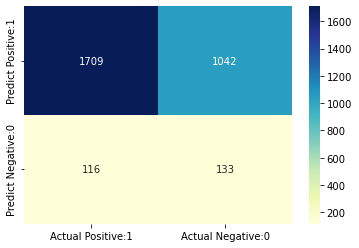

In [34]:

# define model
BRFC = BalancedRandomForestClassifier()


BRFC1 = BRFC.fit(X_train,y_train)
# Faire des nouvelles prediction
y_pred = BRFC1.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme BRFC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_BRFC1_train = fbeta_score(y_train, BRFC1.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_BRFC1_train}")

f2_BRFC1_test = fbeta_score(y_test, BRFC1.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_BRFC1_test}")


## Ballance Random Forest Classifier  avce le data SMOTE

C:\Users\BENSAI~1\AppData\Local\Temp/ipykernel_11480/1247804696.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  BRFC2 = BRFC.fit(X_res, y_res)


[0 0 0 ... 0 0 0]
[0 1]
le rapport de classificatiob de l'algorithme BRFC est : 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2751
           1       0.00      0.00      0.00       249

    accuracy                           0.92      3000
   macro avg       0.46      0.50      0.48      3000
weighted avg       0.84      0.92      0.88      3000

fbeta_score Train =  0.9994306676241875
fbeta_score Train =  0.4909662215239592


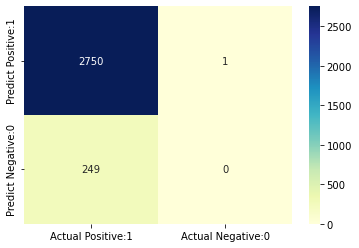

In [35]:

# define model
BRFC = BalancedRandomForestClassifier()


BRFC2 = BRFC.fit(X_res, y_res)
# Faire des nouvelles prediction
y_pred = BRFC2.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme BRFC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_BRFC2_train = fbeta_score(y_train, BRFC2.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_BRFC2_train}")

f2_BRFC2_test = fbeta_score(y_test, BRFC2.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_BRFC2_test}")

## BalancedRandomForestClassifier avce le data original en utilisant le Class Weights

In [36]:
from sklearn.model_selection import GridSearchCV

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

[1 0 0 ... 1 0 1]
[0 1]
le rapport de classificatiob de l'algorithme BRFC est : 

              precision    recall  f1-score   support

           0       0.94      0.65      0.77      2751
           1       0.12      0.52      0.19       249

    accuracy                           0.64      3000
   macro avg       0.53      0.58      0.48      3000
weighted avg       0.87      0.64      0.72      3000

fbeta_score Train =  0.6793761262803646
fbeta_score Train =  0.4984784122134155
 les meilleures parametres sont: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}


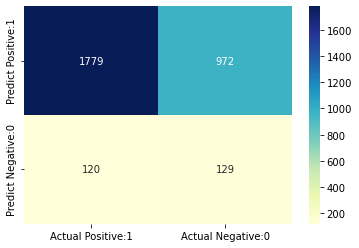

In [102]:

# define model

BRFC = BalancedRandomForestClassifier(class_weight='balanced')
#BRFC = RandomForestClassifier(class_weight='balanced')

param_grid = { 
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [None,3, 4,5],
    
        }
model =GridSearchCV(BRFC,param_grid,cv=5)

BRFC3_cv = model.fit(X_train,y_train)
# Faire des nouvelles prediction
y_pred = BRFC3_cv.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme BRFC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_BRFC3_train = fbeta_score(y_train, BRFC3_cv.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_BRFC3_train}")

f2_BRFC3_test = fbeta_score(y_test, BRFC3_cv.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_BRFC3_test}")
print(f" les meilleures parametres sont: {BRFC3_cv.best_params_}")

## BalancedRandomForestClassifier avce le data SMOTE en utilisant le Class Weights

C:\Users\BENSAI~1\AppData\Local\Temp/ipykernel_11480/2888987908.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  BRFC4 = BRFC.fit(X_res, y_res)


[0 0 0 ... 0 0 0]
[0]
le rapport de classificatiob de l'algorithme BRFC est : 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2751
           1       0.00      0.00      0.00       249

    accuracy                           0.92      3000
   macro avg       0.46      0.50      0.48      3000
weighted avg       0.84      0.92      0.88      3000



C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fbeta_score Train =  1.0
fbeta_score Train =  0.4911096829477292


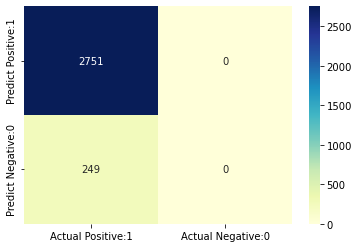

In [38]:

# define model
BRFC = BalancedRandomForestClassifier(class_weight='balanced')


BRFC4 = BRFC.fit(X_res, y_res)
# Faire des nouvelles prediction
y_pred = BRFC4.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme BRFC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_BRFC4_train = fbeta_score(y_train, BRFC4.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_BRFC4_train}")

f2_BRFC4_test = fbeta_score(y_test, BRFC4.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_BRFC4_test}")

# Algorithme XGBoost Classifier

## XGBClassifier avce le data original

In [39]:
from xgboost import XGBClassifier

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[17:36:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 0 0 ... 0 0 0]
[0 1]
le rapport de classificatiob de l'algorithme XGBC est : 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2751
           1       0.25      0.01      0.02       249

    accuracy                           0.92      3000
   macro avg       0.58      0.50      0.49      3000
weighted avg       0.86      0.92      0.88      3000

fbeta_score Train =  0.6014743287048452
fbeta_score Train =  0.4952987421562678


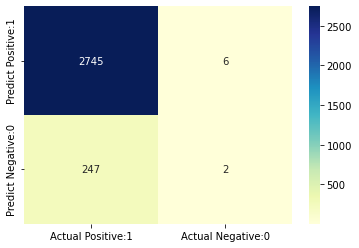

In [40]:

# define model
XGBC = XGBClassifier()


XGBC1 = XGBC.fit(X_train,y_train)
# Faire des nouvelles prediction
y_pred = XGBC1.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme XGBC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_XGBC1_train = fbeta_score(y_train, XGBC1.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_XGBC1_train}")

f2_XGBC1_test = fbeta_score(y_test, XGBC1.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_XGBC1_test}")



## XGBClassifier avce le data SMOTE

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[17:37:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 0 0 ... 0 0 0]
[0 1]
le rapport de classificatiob de l'algorithme EEC est : 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2751
           1       0.00      0.00      0.00       249

    accuracy                           0.92      3000
   macro avg       0.46      0.50      0.48      3000
weighted avg       0.84      0.92      0.88      3000

fbeta_score Train =  0.9626163533526333
fbeta_score Train =  0.4902486069438492


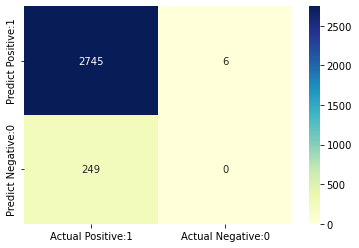

In [41]:


# define model
XGBC = XGBClassifier()


XGBC2 = XGBC.fit(X_res, y_res)
# Faire des nouvelles prediction
y_pred = XGBC2.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme EEC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_XGBC2_train = fbeta_score(y_res, XGBC2.predict(X_res), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_XGBC2_train}")

f2_XGBC2_test = fbeta_score(y_test, XGBC2.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_XGBC2_test}")

## XGBClassifier avce le data original en utilisant le Class Weights

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[17:38:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 0 0 ... 0 0 0]
[0 1]
le rapport de classificatiob de l'algorithme XGBC est : 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2751
           1       0.25      0.01      0.02       249

    accuracy                           0.92      3000
   macro av

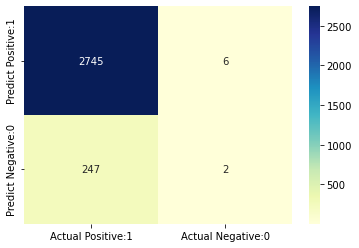

In [42]:
from sklearn.model_selection import GridSearchCV

# define model
XGBC = XGBClassifier(class_weight='balanced')
###########
optimization_dict = {'max_depth': [2,4,6],
                     'n_estimators': [50,100,200]}

#XGBC = GridSearchCV(XGBC, optimization_dict, 
                    # scoring='accuracy', verbose=1)




XGBC.fit(X_train,y_train)
# Faire des nouvelles prediction
y_pred = XGBC.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme XGBC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score


f2_XGBC3_train = fbeta_score(y_train, XGBC.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_XGBC3_train}")

f2_XGBC3_test = fbeta_score(y_test, XGBC.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_XGBC3_test}")

## XGBClassifier avce le data SMOTE en utilisant le Class Weights

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[17:38:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 0 0 ... 0 0 0]
[0 1]
le rapport de classificatiob de l'algorithme XGBC est : 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2751
           1       0.00      0.00      0.00       249

    accuracy                           0.92      3000
   macro av

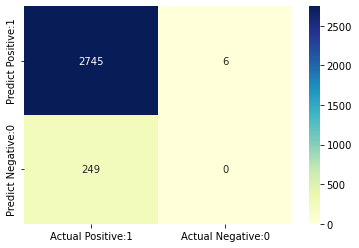

In [43]:

# define model
XGBC4 = XGBClassifier(class_weight='balanced')


XGBC4.fit(X_res, y_res)
# Faire des nouvelles prediction
y_pred = XGBC4.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# F
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme XGBC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_XGBC4_train = fbeta_score(y_res, XGBC4.predict(X_res), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_XGBC4_train}")

f2_XGBC4_test = fbeta_score(y_test, XGBC4.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_XGBC4_test}")

In [44]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# EasyEnsembleClassifier

## EasyEnsembleClassifier avce le data original 

In [45]:
from imblearn.ensemble import EasyEnsembleClassifier

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 0 ... 1 1 0]
[0 1]
le rapport de classificatiob de l'algorithme EEC est : 

              precision    recall  f1-score   support

           0       0.94      0.61      0.74      2751
           1       0.12      0.59      0.20       249

    accuracy                           0.60      3000
   macro avg       0.53      0.60      0.47      3000
weighted avg       0.87      0.60      0.69      3000

fbeta_score Train =  0.5176945896148784
fbeta_score Train =  0.491878562072683


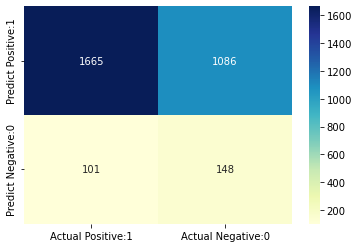

In [46]:

# define model
EEC = EasyEnsembleClassifier(random_state=42)


EEC1 = EEC.fit(X_train,y_train)
# Faire des nouvelles prediction
y_pred = EEC1.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme EEC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_EEC1_train = fbeta_score(y_train, EEC1.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_EEC1_train}")

f2_EEC1_test = fbeta_score(y_test, EEC1.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_EEC1_test}")



## EasyEnsembleClassifier avce le data SMOTE

C:\Users\BENSAIDFawzi\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]
[0 1]
le rapport de classificatiob de l'algorithme EEC est : 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2751
           1       0.30      0.01      0.02       249

    accuracy                           0.92      3000
   macro avg       0.61      0.50      0.49      3000
weighted avg       0.87      0.92      0.88      3000

fbeta_score Train =  0.4948355483449592
fbeta_score Train =  0.49766535842824994


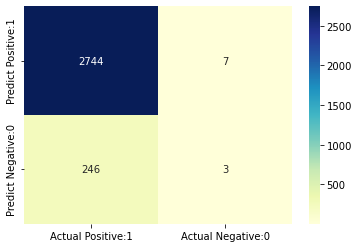

In [47]:

# define model
EEC = EasyEnsembleClassifier(random_state=42)


EEC2 = EEC.fit(X_res, y_res)
# Faire des nouvelles prediction
y_pred = EEC2.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme EEC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_EEC2_train = fbeta_score(y_train, EEC2.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_EEC2_train}")

f2_EEC2_test = fbeta_score(y_test, EEC2.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_EEC2_test}")


# SVC

In [107]:
from sklearn.svm import SVC

## SVC avce le data Original

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[0 0 0 ... 0 0 0]
[0]
le rapport de classificatiob de l'algorithme XGBC est : 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2751
           1       0.00      0.00      0.00       249

    accuracy                           0.92      3000
   macro avg       0.46      0.50      0.48      3000
weighted avg       0.84      0.92      0.88      3000



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


fbeta_score Train =  0.4914783516900873
fbeta_score Train =  0.4911096829477292


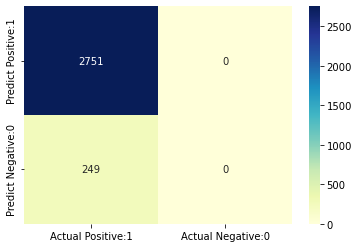

In [108]:
# define model
svc = SVC()


svc1 = svc.fit(X_train,y_train)
# Faire des nouvelles prediction
y_pred = svc1.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme XGBC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_svc1_train = fbeta_score(y_train, svc1.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_svc1_train}")

f2_svc1_test = fbeta_score(y_test, svc1.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_svc1_test}")

## SVC avce le data SMOTE

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[0 1 1 ... 1 0 0]
[0 1]
le rapport de classificatiob de l'algorithme XGBC est : 

              precision    recall  f1-score   support

           0       0.91      0.46      0.61      2751
           1       0.08      0.50      0.13       249

    accuracy                           0.46      3000
   macro avg       0.49      0.48      0.37      3000
weighted avg       0.84      0.46      0.57      3000

fbeta_score Train =  0.38326104953049267
fbeta_score Train =  0.3723060663673513


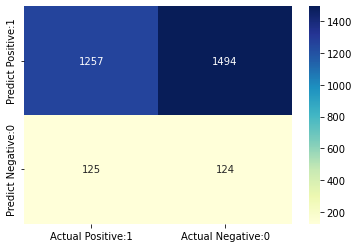

In [109]:

# define model
svc = SVC()


svc2 = svc.fit(X_res, y_res)
# Faire des nouvelles prediction
y_pred = svc2.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme XGBC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_svc2_train = fbeta_score(y_train, svc2.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_svc2_train}")

f2_svc2_test = fbeta_score(y_test, svc2.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_svc2_test}")

In [110]:
## SVC avce le data Original en utilisant le Class Weights

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[0 1 1 ... 1 0 0]
[0 1]
le rapport de classificatiob de l'algorithme XGBC est : 

              precision    recall  f1-score   support

           0       0.91      0.50      0.64      2751
           1       0.08      0.45      0.13       249

    accuracy                           0.50      3000
   macro avg       0.49      0.47      0.39      3000
weighted avg       0.84      0.50      0.60      3000

fbeta_score Train =  0.39991223137074505
fbeta_score Train =  0.38714669157574294


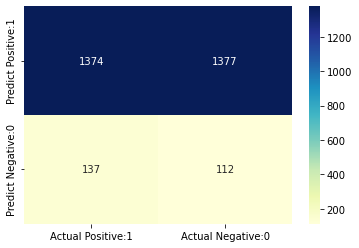

In [111]:

# define model
svc = SVC(class_weight='balanced')


svc3 = svc.fit(X_train,y_train)
# Faire des nouvelles prediction
y_pred = svc3.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme XGBC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_svc3_train = fbeta_score(y_train, svc3.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_svc3_train}")

f2_svc3_test = fbeta_score(y_test, svc3.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_svc3_test}")

In [112]:
##  SVC avce le data SMOTE en utilisant le Class Weights

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[0 1 1 ... 1 0 0]
[0 1]
le rapport de classificatiob de l'algorithme XGBC est : 

              precision    recall  f1-score   support

           0       0.91      0.46      0.61      2751
           1       0.08      0.50      0.13       249

    accuracy                           0.46      3000
   macro avg       0.49      0.48      0.37      3000
weighted avg       0.84      0.46      0.57      3000

fbeta_score Train =  0.38326104953049267
fbeta_score Train =  0.3723060663673513


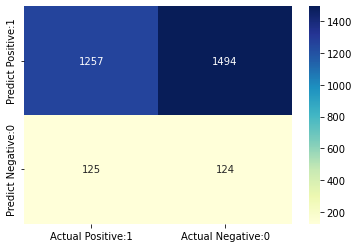

In [113]:

# define model
svc = SVC(class_weight='balanced')


svc4 = svc.fit(X_res, y_res)
# Faire des nouvelles prediction
y_pred = svc4.predict(X_test)
print(y_pred)
print( np.unique( y_pred) )



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation de modele
print(f"le rapport de classificatiob de l'algorithme XGBC est : \n")
print(classification_report(y_test,y_pred))


# Calculation of F-beta Score
from sklearn.metrics import fbeta_score

f2_svc4_train = fbeta_score(y_train, svc4.predict(X_train), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_svc4_train}")

f2_svc4_test = fbeta_score(y_test, svc4.predict(X_test), average='macro', beta=2)
print(f"fbeta_score Train =  {f2_svc4_test}")

# Comparer les F2 Score afin de choisir e meilleure modele

In [114]:
# Creér un dictionnaire pour afficher les resultats des algorithmes

f2_score_train = {
  "lr1": f2_lr1_train,
  "lr2": f2_lr2_train,
  "lr3": f2_lr3_train,
  "lr4": f2_lr4_train,
    
  "BRFC1": f2_BRFC1_train,   
  "BRFC2": f2_BRFC2_train,
  "BRFC3": f2_BRFC3_train,   
  "BRFC4": f2_BRFC4_train,
    
   "XGBC1": f2_XGBC1_train,
   "XGBC2": f2_XGBC2_train,
   "XGBC3": f2_XGBC3_train,
   "XGBC4": f2_XGBC4_train,
    
   "SVC1": f2_svc1_train,
   "SVC2": f2_svc2_train,
   "SVC3": f2_svc3_train,
   "SVC4": f2_svc4_train,
    
    "EEC1": f2_EEC1_train,
    "EEC2": f2_EEC2_train   
}



f2_score_test = {
  "lr1": f2_lr1_test,
  "lr2": f2_lr2_test,
  "lr3": f2_lr3_test,
  "lr4": f2_lr4_test,
    
  "BRFC1": f2_BRFC1_test,   
  "BRFC2": f2_BRFC2_test,
  "BRFC3": f2_BRFC3_test,   
  "BRFC4": f2_BRFC4_test,
    
   "XGBC1": f2_XGBC1_test,
   "XGBC2": f2_XGBC2_test,
   "XGBC3": f2_XGBC3_test,
   "XGBC4": f2_XGBC4_test,
    
    
   "SVC1": f2_svc1_test,
   "SVC2": f2_svc2_test,
   "SVC3": f2_svc3_test,
   "SVC4": f2_svc4_test,
    
    "EEC1": f2_EEC1_test,
    "EEC2": f2_EEC2_test   
}

In [115]:
f2_score_train

{'lr1': 0.4914783516900873,
 'lr2': 0.4798940435026906,
 'lr3': 0.5168703865810279,
 'lr4': 0.5201386070045702,
 'BRFC1': 0.6715537762871473,
 'BRFC2': 0.9994306676241875,
 'BRFC3': 0.6793761262803646,
 'BRFC4': 1.0,
 'XGBC1': 0.6014743287048452,
 'XGBC2': 0.9626163533526333,
 'XGBC3': 0.6014743287048452,
 'XGBC4': 0.38326104953049267,
 'SVC1': 0.4914783516900873,
 'SVC2': 0.38326104953049267,
 'SVC3': 0.39991223137074505,
 'SVC4': 0.38326104953049267,
 'EEC1': 0.5176945896148784,
 'EEC2': 0.4948355483449592}

In [116]:
f2_score_test

{'lr1': 0.4911096829477292,
 'lr2': 0.467309876884345,
 'lr3': 0.4901782623745241,
 'lr4': 0.491467349275345,
 'BRFC1': 0.4861897591459125,
 'BRFC2': 0.4909662215239592,
 'BRFC3': 0.4984784122134155,
 'BRFC4': 0.4911096829477292,
 'XGBC1': 0.4952987421562678,
 'XGBC2': 0.4902486069438492,
 'XGBC3': 0.4952987421562678,
 'XGBC4': 0.3723060663673513,
 'SVC1': 0.4911096829477292,
 'SVC2': 0.3723060663673513,
 'SVC3': 0.38714669157574294,
 'SVC4': 0.3723060663673513,
 'EEC1': 0.491878562072683,
 'EEC2': 0.49766535842824994}

In [117]:
# Créer un tableau à partir des dictionnaires

mydicts = [f2_score_train, f2_score_test]
f2_score_tab = pd.concat([pd.Series(d) for d in mydicts], axis=1).fillna(0).T
f2_score_tab.index = ['f2_score_train', 'f2_score_test']
f2_score_tab

,lr1,lr2,lr3,lr4,BRFC1,BRFC2,BRFC3,BRFC4,XGBC1,XGBC2,XGBC3,XGBC4,SVC1,SVC2,SVC3,SVC4,EEC1,EEC2
f2_score_train,0.491478,0.479894,0.516870,0.520139,0.671554,0.999431,0.679376,1.00000,0.601474,0.962616,0.601474,0.383261,0.491478,0.383261,0.399912,0.383261,0.517695,0.494836
f2_score_test,0.491110,0.467310,0.490178,0.491467,0.486190,0.490966,0.498478,0.49111,0.495299,0.490249,0.495299,0.372306,0.491110,0.372306,0.387147,0.372306,0.491879,0.497665


In [54]:
#pip install shap

# Exporter le meilleur modele

In [58]:
import pickle
pickle.dump(BRFC3_cv, open('model.pkl', 'wb'))


In [59]:
# tester le meilleur model qu'on a deja exporter
import joblib
clf = joblib.load('model.pkl')
result  = clf.predict(X_test)
print(result)

[0 0 0 ... 1 0 1]


## Afficher les graphique shap plot

In [57]:
import shap

In [60]:
import shap
shap.initjs()

In [61]:
data_graph = X_train.iloc[:500,]


In [63]:
explainer = shap.TreeExplainer(clf)

In [64]:
shap_values = explainer.shap_values(data_graph)
#shap_values = explainer(data_graph)

In [66]:
shap.force_plot(explainer.expected_value[1], shap_values[1][123,:], data_graph.iloc[123,:])

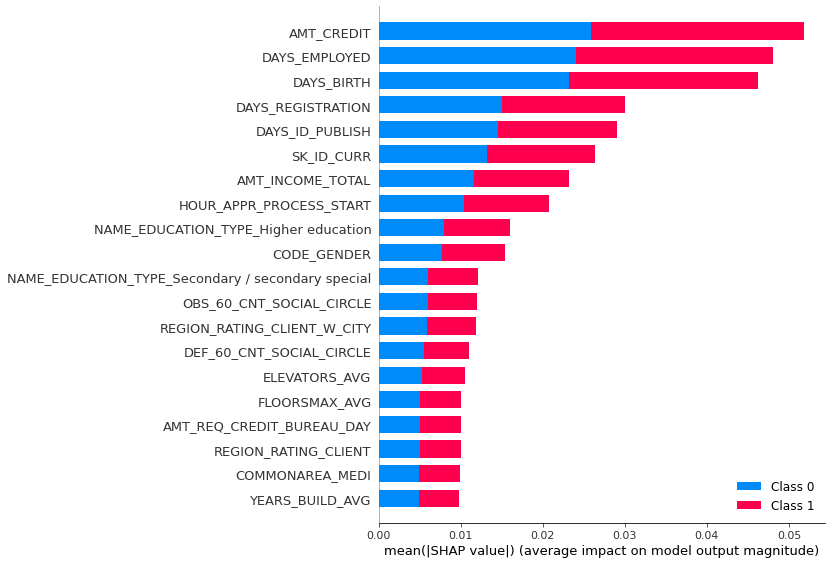

In [67]:

shap.summary_plot(shap_values, data_graph)


## Exproter le tableau pour l'utliser dans le dashboard

In [69]:
# Ajouter la collone target au tableau X_test
client_list3 = X_train 
client_list3['TARGET'] = y

client_list3 = X_train.iloc[:1000,]
client_list3

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,TARGET
346,100398.0,0.0,0.0,0.0,1.0,0.000000,0.090150,0.098630,0.071783,0.071783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13028,115186.0,0.0,0.5,0.0,1.0,0.000000,0.177537,0.140040,0.125924,0.125924,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
8821,110256.0,0.0,0.0,0.0,0.0,0.000000,0.136413,0.123576,0.108979,0.108979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25676,129859.0,0.0,0.0,0.0,0.0,0.000000,0.049027,0.123576,0.079466,0.079466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7534,108784.0,0.0,0.0,0.0,1.0,0.000000,0.177537,0.373035,0.354730,0.354730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26222,130501.0,0.0,0.0,1.0,1.0,0.000000,0.093234,0.456090,0.387444,0.387444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15509,118101.0,0.0,0.5,0.0,1.0,0.000000,0.079869,0.373035,0.219715,0.219715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8005,109333.0,0.0,0.5,1.0,0.0,0.000000,0.085009,0.173837,0.120843,0.120843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22566,126259.0,0.0,0.0,0.0,1.0,0.000015,0.177537,0.287820,0.204884,0.204884,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [70]:
client_list3.to_csv('client_list3.csv')

In [71]:
df1 = pd.read_csv('client_list3.csv')
df1

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,TARGET
0,346,100398.0,0.0,0.0,0.0,1.0,0.000000,0.090150,0.098630,0.071783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,13028,115186.0,0.0,0.5,0.0,1.0,0.000000,0.177537,0.140040,0.125924,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,8821,110256.0,0.0,0.0,0.0,0.0,0.000000,0.136413,0.123576,0.108979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,25676,129859.0,0.0,0.0,0.0,0.0,0.000000,0.049027,0.123576,0.079466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7534,108784.0,0.0,0.0,0.0,1.0,0.000000,0.177537,0.373035,0.354730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,26222,130501.0,0.0,0.0,1.0,1.0,0.000000,0.093234,0.456090,0.387444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
996,15509,118101.0,0.0,0.5,0.0,1.0,0.000000,0.079869,0.373035,0.219715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
997,8005,109333.0,0.0,0.5,1.0,0.0,0.000000,0.085009,0.173837,0.120843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
998,22566,126259.0,0.0,0.0,0.0,1.0,0.000015,0.177537,0.287820,0.204884,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
